# Mapa do resultado do 2º Turno das Eleições Presidencias de 2018 por Município - DASK

In [1]:
# Importando as bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import time
import pandas as pd
import dask.dataframe as dd

In [2]:
start_time = time.time()
# Caminho para o arquivo Shapefile 
caminho_shapefile = r'D:\Usuários\Downloads\br_municipios\BRMUE250GC_SIR.shp'

# Ler o Shapefile
df_mapa = gpd.read_file(caminho_shapefile)


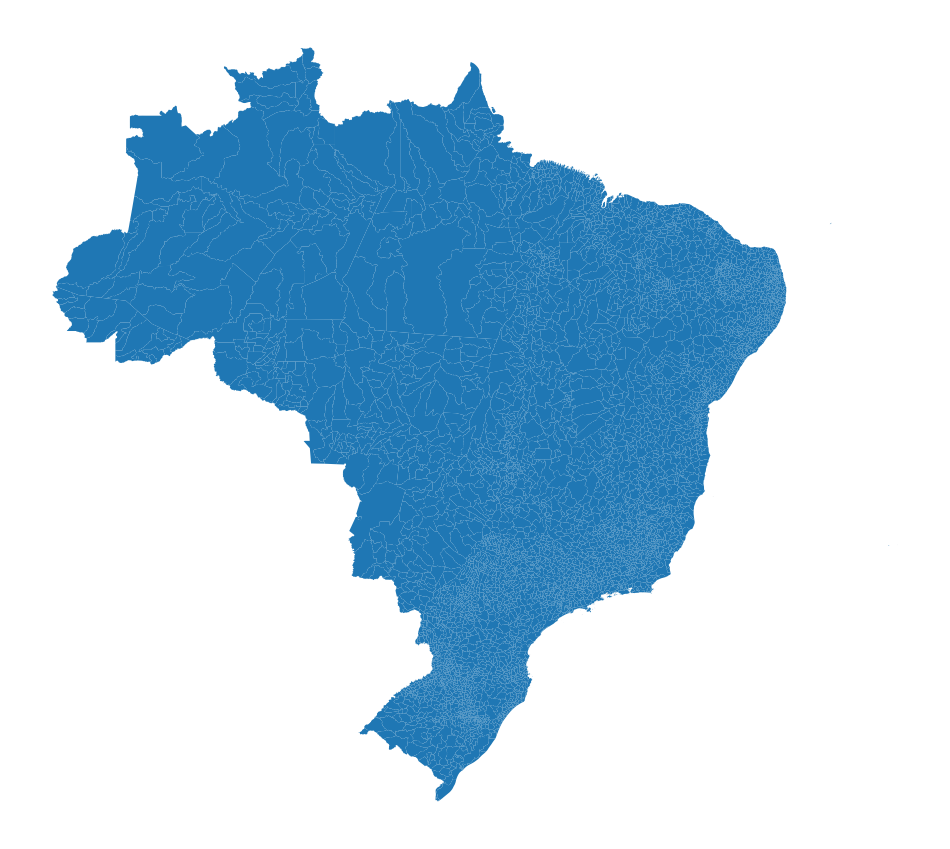

In [3]:
# Vamos expandir o espaço para desenhar o mapa
fig, ax = plt.subplots(1, figsize=(12,12))

# desenhar o mapa
df_mapa.plot(ax=ax)

# tirar os eixos
ax.set_axis_off()

plt.show()

In [5]:
# Vamos carregar o arquivo com o resultado da eleição no Brasil dividido por municipio/zona via DASK
# Configuração do Dask
#dask.config.set({'dataframe.query-planning': True})

ddf = dd.read_csv("D:\\Usuários\\Downloads\\votacao_candidato_munzona_2018_BRASIL.csv", 
                  delimiter=';', 
                  header=0,
                  encoding='latin1', 
                  dtype={'CD_MUNICIPIO': 'int', 'SG_UF': 'str','NM_MUNICIPIO': 'str','NR_CANDIDATO': 'int','NM_URNA_CANDIDATO': 'str','QT_VOTOS_NOMINAIS': 'int','NR_TURNO': 'int'},
                  usecols=['CD_MUNICIPIO', 'SG_UF', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS', 'NR_TURNO'])

In [6]:
ddf_filtro = ddf.query('(NR_CANDIDATO == 13 or NR_CANDIDATO == 17) and NR_TURNO == 2')

ddf_filtrado = ddf_filtro.compute()  # Use compute() para obter o resultado como um DataFrame Pandas
print(ddf_filtrado)


       NR_TURNO SG_UF  CD_MUNICIPIO          NM_MUNICIPIO  NR_CANDIDATO  \
80784         2    ZZ         29580            CONCEPCIÓN            13   
16828         2    RS         89141         CAPÃO DO CIPÓ            17   
16829         2    RS         85707             SEDE NOVA            17   
16830         2    RS         88935  SÃO SEBASTIÃO DO CAÍ            17   
16831         2    RS         87378                 MARAU            17   
...         ...   ...           ...                   ...           ...   
76837         2    PE         25690  SÃO JOSÉ DO BELMONTE            13   
76838         2    RN         17337                 LAJES            13   
76839         2    RS         85626                 IVORÁ            13   
76840         2    RS         89214              TAPEJARA            13   
76841         2    ZZ         30066                 MADRI            13   

      NM_URNA_CANDIDATO  QT_VOTOS_NOMINAIS  
80784   FERNANDO HADDAD                  0  
16828    

In [12]:
#Criando índices
ddf_urna = ddf_filtrado.set_index('NR_TURNO')
print(ddf_urna.head())


         SG_UF  CD_MUNICIPIO          NM_MUNICIPIO  NR_CANDIDATO  \
NR_TURNO                                                           
2           ZZ         29580            CONCEPCIÓN            13   
2           RS         89141         CAPÃO DO CIPÓ            17   
2           RS         85707             SEDE NOVA            17   
2           RS         88935  SÃO SEBASTIÃO DO CAÍ            17   
2           RS         87378                 MARAU            17   

         NM_URNA_CANDIDATO  QT_VOTOS_NOMINAIS  
NR_TURNO                                       
2          FERNANDO HADDAD                  0  
2           JAIR BOLSONARO                943  
2           JAIR BOLSONARO               1015  
2           JAIR BOLSONARO               8758  
2           JAIR BOLSONARO              17922  


In [14]:
# Mas o Brasil tem 5570 municipios
# Vamos verificar algumas cidades fora do Brasil
#df_votacao[df_votacao['SG_UF'] == 'ZZ'].sample(4).T  ##solução com pandas
ddf_filtrado[ddf_filtrado['SG_UF'] == 'ZZ']

,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
80784,2,ZZ,29580,CONCEPCIÓN,13,FERNANDO HADDAD,0
18025,2,ZZ,30821,WINDHOEK,17,JAIR BOLSONARO,11
18026,2,ZZ,30430,RIO BRANCO,17,JAIR BOLSONARO,10
18027,2,ZZ,39306,ISTAMBUL,17,JAIR BOLSONARO,55
18028,2,ZZ,98000,GUATEMALA,17,JAIR BOLSONARO,103
...,...,...,...,...,...,...,...
75314,2,ZZ,30287,PARIS,13,FERNANDO HADDAD,2953
76210,2,ZZ,29696,FRANKFURT,13,FERNANDO HADDAD,1327
76832,2,ZZ,29599,COPENHAGUE-DINA,13,FERNANDO HADDAD,420
76833,2,ZZ,29947,LIMA,13,FERNANDO HADDAD,151


In [15]:
# Quantas cidades fora do Brasil estão no conjunto de dados?
ddf_filtrado[ddf_filtrado['SG_UF'] == 'ZZ']['CD_MUNICIPIO'].nunique()

138

In [16]:
# Vamos eliminar os municipios de fora do Brasil
df_votacao = ddf_filtrado[ddf_filtrado['SG_UF'] != 'ZZ']

In [17]:
# Verificando a quantidade de municipios --> Agora sim temos 5.570 municípios.
df_votacao['CD_MUNICIPIO'].nunique()

5570

In [19]:
# Precisamos agregar os dados por municipio e candidato
df_votacao.groupby(['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO']).sum()

NR_TURNO  \
SG_UF CD_MUNICIPIO NM_MUNICIPIO           NR_CANDIDATO NM_URNA_CANDIDATO             
AC    1007         BUJARI                 13           FERNANDO HADDAD           2   
                                          17           JAIR BOLSONARO            2   
      1015         CAPIXABA               13           FERNANDO HADDAD           2   
                                          17           JAIR BOLSONARO            2   
      1023         PORTO ACRE             13           FERNANDO HADDAD           2   
...                                                                            ...   
TO    96954        ALIANÇA DO TOCANTINS   17           JAIR BOLSONARO            2   
      96970        APARECIDA DO RIO NEGRO 13           FERNANDO HADDAD           2   
                                          17           JAIR BOLSONARO            2   
      96997        BARROLÂNDIA            13           FERNANDO HADDAD           2   
                                          17           JAIR BOLSONARO            2   

                                                                          QT_VOTOS_NOMINAIS  
SG_UF CD_MUNICIPIO NM_MUNICIPIO           NR_CANDIDATO NM_URNA_CANDIDATO                     
AC    1007         BUJARI                 13           FERNANDO HADDAD                 1274  
                                          17           JAIR BOLSONARO                  4676  
      1015         CAPIXABA               13           FERNANDO HADDAD                 1086  
                                          17           JAIR BOLSONARO                  3895  
      1023         PORTO ACRE             13           FERNANDO HADDAD                 2059  
...                                                                                     ...  
TO    96954        ALIANÇA DO TOCANTINS   17           JAIR BOLSONARO                  1215  
      96970        APARECIDA DO RIO NEGRO 13           FERNANDO HADDAD                 1291  
                                          17           JAIR BOLSONARO                  1171  
      96997        BARROLÂNDIA            13           FERNANDO HADDAD                 1545  
                                          17           JAIR BOLSONARO                  1501  

[11669 rows x 2 columns]

In [ ]:
# Fazer o groupby, reindexar o indice, vai salvar isso em um dataframe
df_votacao = df_votacao.groupby(['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO', 'NR_TURNO']).sum().reset_index()


,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,NR_TURNO,QT_VOTOS_NOMINAIS
9988,SE,31372,CUMBE,17,JAIR BOLSONARO,2,840
4967,PA,4650,IGARAPÉ-MIRI,17,JAIR BOLSONARO,2,9576
1115,BA,39012,SENHOR DO BONFIM,17,JAIR BOLSONARO,2,11791
2075,GO,94455,LUZIÂNIA,17,JAIR BOLSONARO,2,58032


In [22]:
# Ordenar o dataframe pela quantidade de votos e depois deixar apenas o primeiro
# registro de cada municipio
df_votacao.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False).head(10)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,NR_TURNO,QT_VOTOS_NOMINAIS
11252,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,2,3694834
11251,SP,71072,SÃO PAULO,13,FERNANDO HADDAD,2,2424125
7369,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,2,2179896
7368,RJ,60011,RIO DE JANEIRO,13,FERNANDO HADDAD,2,1105393
1607,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,2,1080411
1054,BA,38490,SALVADOR,13,FERNANDO HADDAD,2,985532
2937,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,2,901513
6659,PR,75353,CURITIBA,17,JAIR BOLSONARO,2,786377
1376,CE,13897,FORTALEZA,13,FERNANDO HADDAD,2,739265
309,AM,2550,MANAUS,17,JAIR BOLSONARO,2,686999


In [ ]:
# Vamos ordenar
df_votacao.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False, inplace=True)

# dropar as linhas duplicadas, mantendo a primeira
df_votacao.drop_duplicates(subset='CD_MUNICIPIO', keep='first', inplace=True)


,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,NR_TURNO,QT_VOTOS_NOMINAIS
11252,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,2,3694834
7369,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,2,2179896
1607,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,2,1080411
1054,BA,38490,SALVADOR,13,FERNANDO HADDAD,2,985532
2937,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,2,901513
6659,PR,75353,CURITIBA,17,JAIR BOLSONARO,2,786377
1376,CE,13897,FORTALEZA,13,FERNANDO HADDAD,2,739265
309,AM,2550,MANAUS,17,JAIR BOLSONARO,2,686999
2013,GO,93734,GOIÂNIA,17,JAIR BOLSONARO,2,528525
5834,PE,25313,RECIFE,13,FERNANDO HADDAD,2,482673


In [25]:
# Agora vamos criar uma coluna representando o resultado da eleição naquele municipio
# sendo que o Resultado é True se o candidato Bolsonaro venceu naquele municipio
# e False em caso contrário
df_votacao['RESULTADO'] = df_votacao['NR_CANDIDATO'].apply(lambda x: x == 17)

In [ ]:
# Recuperar a tabela de correspondencia entre IBGE e TSE
# direto do github do Estadão
link = 'https://raw.githubusercontent.com/estadao/como-votou-sua-vizinhanca/master/data/votos/correspondencia-tse-ibge.csv'

df_equivalencia = pd.read_csv(link)


,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE
0,ac acrelandia,ACRELÂNDIA,AC,1200013,1120,NaN
1,ac assis brasil,ASSIS BRASIL,AC,1200054,1570,NaN
2,ac brasileia,BRASILÉIA,AC,1200104,1058,NaN
3,ac bujari,BUJARI,AC,1200138,1007,NaN
4,ac capixaba,CAPIXABA,AC,1200179,1015,NaN


In [31]:
# Vamos preparar os dataframes

In [ ]:
# Vamos reindexar o dataframe de votação pelo código do TSE
df_vot_novo = df_votacao.copy()

df_vot_novo.set_index('CD_MUNICIPIO', drop=False, inplace=True)


,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,NR_TURNO,QT_VOTOS_NOMINAIS,RESULTADO
CD_MUNICIPIO,,,,,,,,
71072,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,2,3694834,True
60011,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,2,2179896,True
97012,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,2,1080411,True
38490,BA,38490,SALVADOR,13,FERNANDO HADDAD,2,985532,False
41238,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,2,901513,True


In [ ]:
# Vamos reindexar o dataframe de Equivalencia pelo Código do TSE
df_equi_novo = df_equivalencia.copy()

df_equi_novo.set_index('COD_TSE', drop=False, inplace=True)


,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE
COD_TSE,,,,,,
1120,ac acrelandia,ACRELÂNDIA,AC,1200013,1120,NaN
1570,ac assis brasil,ASSIS BRASIL,AC,1200054,1570,NaN
1058,ac brasileia,BRASILÉIA,AC,1200104,1058,NaN
1007,ac bujari,BUJARI,AC,1200138,1007,NaN
1015,ac capixaba,CAPIXABA,AC,1200179,1015,NaN


In [ ]:
# Criando um novo dataframe com base no merge de Votação e Equivalencia
df_vot_equi = df_vot_novo.join(df_equi_novo)


,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,NR_TURNO,QT_VOTOS_NOMINAIS,RESULTADO,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE
CD_MUNICIPIO,,,,,,,,,,,,,,
71072,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,2,3694834,True,sp sao paulo,SÃO PAULO,SP,3550308,71072,NaN
60011,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,2,2179896,True,rj rio de janeiro,RIO DE JANEIRO,RJ,3304557,60011,NaN
97012,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,2,1080411,True,df brasilia,BRASÍLIA,DF,5300108,97012,NaN
38490,BA,38490,SALVADOR,13,FERNANDO HADDAD,2,985532,False,ba salvador,SALVADOR,BA,2927408,38490,NaN
41238,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,2,901513,True,mg belo horizonte,BELO HORIZONTE,MG,3106200,41238,NaN


In [ ]:
# Transformar a coluna de codigo de IBGE do dataframe de Votação/Equivalência
df_vot_equi['GEOCOD_IBGE'] = df_vot_equi['GEOCOD_IBGE'].astype(str)

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 71072 to 90239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UF              5570 non-null   string
 1   CD_MUNICIPIO       5570 non-null   int64 
 2   NM_MUNICIPIO       5570 non-null   string
 3   NR_CANDIDATO       5570 non-null   int64 
 4   NM_URNA_CANDIDATO  5570 non-null   string
 5   NR_TURNO           5570 non-null   int64 
 6   QT_VOTOS_NOMINAIS  5570 non-null   int64 
 7   RESULTADO          5570 non-null   bool  
 8   chave              5570 non-null   object
 9   NOME               5570 non-null   object
 10  UF                 5570 non-null   object
 11  GEOCOD_IBGE        5570 non-null   object
 12  COD_TSE            5570 non-null   int64 
 13  AJUSTE             29 non-null     object
dtypes: bool(1), int64(5), object(5), string(3)
memory usage: 901.5+ KB


In [42]:
# Vamos unificar os indices

# Mudando o indice do dataframe de Mapa
df_mapa.set_index('CD_GEOCMU', drop=False, inplace=True)

In [43]:
# Mudando o indice do dataframe de Votação/Equivalência
df_vot_equi.set_index('GEOCOD_IBGE', drop=False, inplace=True)

In [ ]:
# Vamos juntar os dataframes
df_mapa_novo = df_mapa.join(df_vot_equi)

CD_GEOCMU,1501956,2111250,5201454,5202353,1502855
NM_MUNICIP,CACHOEIRA DO PIRIÁ,SÃO JOSÉ DOS BASÍLIOS,APARECIDA DO RIO DOCE,ARENÓPOLIS,CURUÁ
CD_GEOCMU,1501956,2111250,5201454,5202353,1502855
geometry,POLYGON ((-46.31955231999996 -1.75517617399992...,POLYGON ((-44.634092315999965 -5.0349752749999...,POLYGON ((-51.14229517499996 -18.2967249689999...,POLYGON ((-51.69953044199997 -16.2326965739999...,POLYGON ((-55.17192719299993 -1.83330502899997...
SG_UF,PA,MA,GO,GO,PA
CD_MUNICIPIO,4766.0,8362.0,93009.0,96717.0,4740.0
NM_MUNICIPIO,CACHOEIRA DO PIRIÁ,SÃO JOSÉ DOS BASÍLIOS,APARECIDA DO RIO DOCE,ARENÓPOLIS,CURUÁ
NR_CANDIDATO,13.0,13.0,17.0,13.0,13.0
NM_URNA_CANDIDATO,FERNANDO HADDAD,FERNANDO HADDAD,JAIR BOLSONARO,FERNANDO HADDAD,FERNANDO HADDAD
NR_TURNO,2.0,2.0,2.0,2.0,2.0
QT_VOTOS_NOMINAIS,6460.0,3743.0,873.0,1157.0,5629.0


In [46]:
# Vamos descobrir os 2 municipios a mais no mapa
df_mapa_novo[df_mapa_novo['NR_CANDIDATO'].isnull()]

,NM_MUNICIP,CD_GEOCMU,geometry,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,NR_TURNO,QT_VOTOS_NOMINAIS,RESULTADO,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE
CD_GEOCMU,,,,,,,,,,,,,,,,,
4300001,LAGOA MIRIM,4300001,"POLYGON ((-52.62241 -32.14662, -52.62802 -32.1...",<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4300002,LAGOA DOS PATOS,4300002,"POLYGON ((-51.2719 -30.03897, -51.27064 -30.03...",<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Matar a coluna ajuste
df_mapa_novo.drop(columns=['AJUSTE'], inplace=True)

In [48]:
# Vamos eliminar a informação das duas lagoas do RS
df_mapa_novo.dropna(inplace=True)

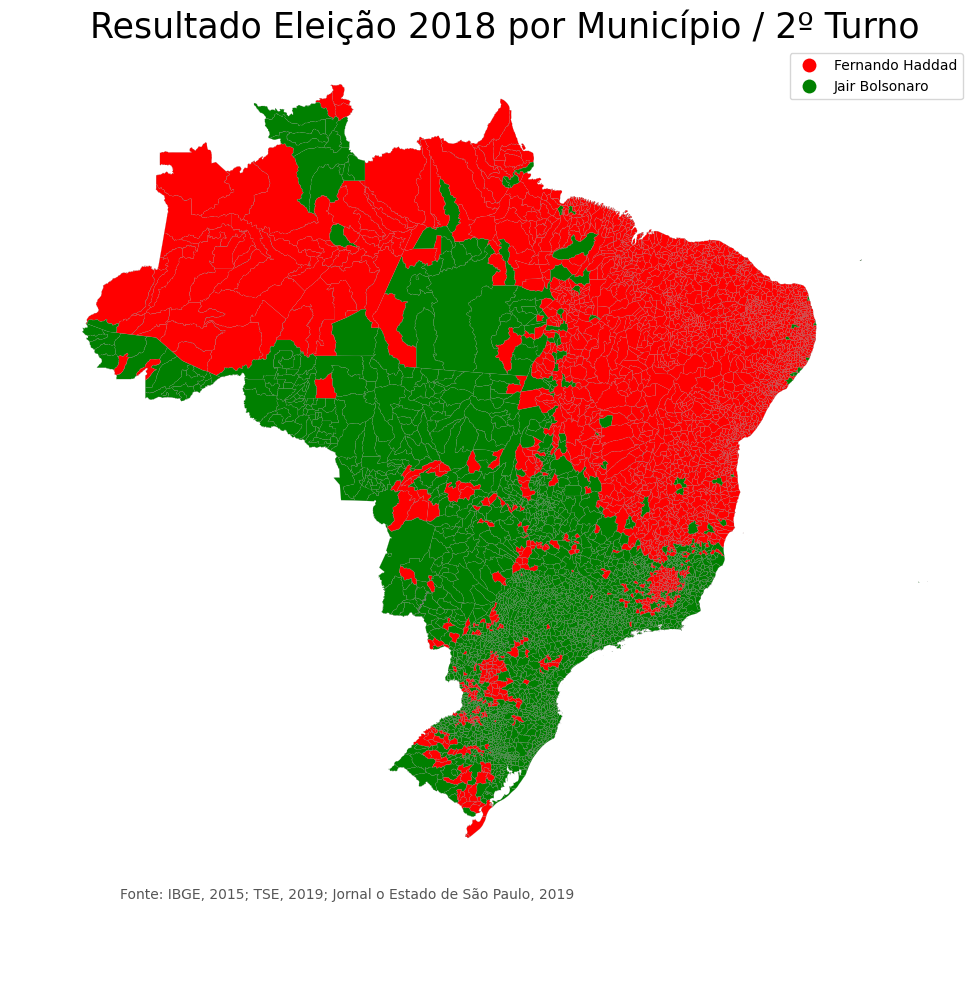

In [50]:
# Vamos desenhar o mapa

# Criar a referência para o código de cor (False/0 = red, True/1 = green)
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'green'])

# Desenhando o mapa
fig, ax = plt.subplots(1, figsize=(12, 12))

ax = df_mapa_novo.plot(column='RESULTADO', cmap=cmap, legend=True, linewidth=0.1, ax=ax,
                      edgecolor='grey')

# Escondendo o eixos
ax.set_axis_off()

# Colocando um título
ax.set_title('Resultado Eleição 2018 por Município / 2º Turno', fontdict={'fontsize': '25', 'fontweight': '3'})

# Criando uma nota do rodapé
ax.annotate('Fonte: IBGE, 2015; TSE, 2019; Jornal o Estado de São Paulo, 2019',
    xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left',
    verticalalignment='top', fontsize=10, color='#555555')

# Alterando a legenda
leg = ax.get_legend()
leg.get_texts()[0].set_text('Fernando Haddad')
leg.get_texts()[1].set_text('Jair Bolsonaro')

plt.show()

In [51]:
tempo = time.time() - start_time
print(f"Tempo DASK Completo: {tempo:.2f} sec")

Tempo DASK Completo: 61.19 sec
